In [95]:
import pandas as pd
import re
from copy import copy
import string
from random import choice
import numpy as np
import matplotlib as plt

# Пункт а

In [96]:
df = pd.read_csv('Emails.csv')
df.RawText = map(lambda s: s.split('\n'), df.RawText)
df.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,"[UNCLASSIFIED, U.S. Department of State, Case ..."
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...","[UNCLASSIFIED, U.S. Department of State, Case ..."
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,"[UNCLASSIFIED, U.S. Department of State, Case ..."
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,"[UNCLASSIFIED, U.S. Department of State, Case ..."
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...","[B6, UNCLASSIFIED, U.S. Department of State, C..."


# Пункт b

In [97]:
df.columns

Index([u'Id', u'DocNumber', u'MetadataSubject', u'MetadataTo', u'MetadataFrom',
       u'SenderPersonId', u'MetadataDateSent', u'MetadataDateReleased',
       u'MetadataPdfLink', u'MetadataCaseNumber', u'MetadataDocumentClass',
       u'ExtractedSubject', u'ExtractedTo', u'ExtractedFrom', u'ExtractedCc',
       u'ExtractedDateSent', u'ExtractedCaseNumber', u'ExtractedDocNumber',
       u'ExtractedDateReleased', u'ExtractedReleaseInPartOrFull',
       u'ExtractedBodyText', u'RawText'],
      dtype='object')

# Пункт с

In [98]:
temp = df[['MetadataSubject', 'SenderPersonId', 'MetadataDateSent', 'ExtractedBodyText']].dropna()

In [99]:
new_df = copy(df.RawText)

In [100]:
weeks_days =  '|'.join(['Monday' , 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
months = '|'.join(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
               'October', 'November', 'December'])
time = '[0-9]{1,2}, 20[0-9]{2} [0-9]{1,2}:[0-9]{2} AM'
time2 = '[0-9]{1,2}, 20[0-9]{2} [0-9]{1,2}:[0-9]{2} PM'
date = '[0-9]{2}/[0-9]{2}/[0-9]{4}'
number = 'No. [A-Z][0-9,-]*'

In [101]:
def trash_contain(phrase, trash = {'Case', 'From', 'To', 'UNCLASSIFIED', 
                                            'Sent', 'Date', 'Doc', 'U.S. Department',
                                           'STATE DEPT', 'SUBJECT TO', 'RELEASE', '\x0c',
                                            'March', 'January', 'February', 'April', 'May',
                                           'June', 'July', 'August', 'September', 'October',
                                           'November', 'December', 'Cc', 'Monday', 'Tuesday', 
                                           'Wednesday', 'Thursday', 'Friday', 'Saturday', 
                                            'Sunday', 'Re', 'cc'}):
    for tr in trash:
        if phrase.startswith(tr):
            return False
    return True

In [102]:
def delete(phrase, trash = {'Subject:', 'Subject', 'Case', 'From', 'To', 'UNCLASSIFIED',
                                            'Sent:', 'Date', 'Doc', 'U.S. Department',
                                           'STATE DEPT', 'SUBJECT TO', 'RELEASE', '\x0c', 'Fw:',
                                            'Cc',  'Re', 'cc', '\<(.*?)\>', 'H',
                                           '\n\n', number, ':{\s}{>0}\n', ',{\s}{>1}', '{\s}{>1}', '{\n}{>1}', 
                                          time2}):
    
    for tr in trash:
        phrase = re.sub(tr, '', phrase)
    return phrase

In [103]:
def not_space(phrase):
    return phrase != ' ' and phrase != ''

In [104]:
new_df = map(lambda s: filter(trash_contain, s), df.RawText)
new_df = map(lambda s: filter(not_space, s), new_df)
new_df = map(lambda s: map(lambda t: delete(t), s), new_df)
new_df = map(lambda s: ' '.join(s), new_df)

In [105]:
temp.ExtractedBodyText = temp.ExtractedBodyText.apply(delete)

# Пункт d

In [106]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [107]:
vectorizer = CountVectorizer(ngram_range=(2,2))
corpus = vectorizer.fit_transform(temp.ExtractedBodyText)

In [108]:
res = np.array(corpus.sum(axis=0))[0]
res.argmax()

148695

In [109]:
filter(lambda s: vectorizer.vocabulary_[s] == res.argmax(), vectorizer.vocabulary_.keys())

[u'of the']

# Пункт e

In [110]:
import nltk
from nltk.collocations import *

In [111]:
with open('hw2.txt', 'w') as f:
    for text in new_df:
        for word in text.split():
            f.write(word + '\n')

In [112]:
bigrams = nltk.collocations.BigramAssocMeasures()

In [113]:
for bigram in BigramCollocationFinder.from_words(nltk.corpus.genesis.words('./hw2.txt'), window_size=2).nbest(bigrams.pmi, 10):
    print bigram[0], bigram[1]

!.: tam
"> 123456789101112131415161718192021222324252627282930
"\ Nikileaks
%-=, B3196287623454
%.... 26d
%: prtArg
',..' esources
'.;. tiPCY
(.. ttlt1er
(..; krt


# Пункт f

In [114]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

In [115]:
corpus = TfidfVectorizer(max_features=1000).fit_transform(new_df)

In [116]:
%time y = KMeans(n_clusters=3).fit_predict(corpus)

CPU times: user 1min 56s, sys: 380 ms, total: 1min 56s
Wall time: 1min 57s


In [117]:
X = TSNE().fit_transform(corpus.todense())

In [118]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['choice', 'plt', 'f', 'number', 'copy', 'text', 'delete']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [119]:
cm?

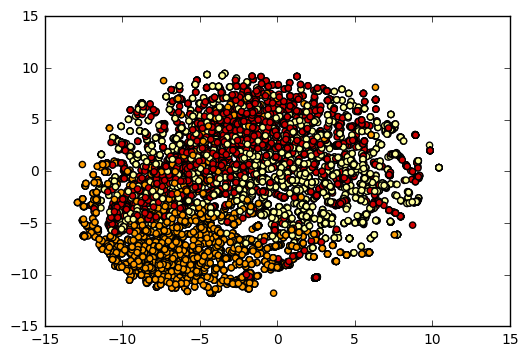

In [120]:
color = cm.hot(np.linspace(0.3, 0.9, 3))
plt.figure()
plt.scatter(X[:,0], X[:,1], c=color[y])
plt.show()

# Пункт h

In [121]:
def show(data, clusterizer, decompositor, num_classes=3):
    y = clusterizer.fit_predict(data)
    X = decompositor.fit_transform(data)
    color = cm.hot(np.linspace(0.3, 0.9, num_classes))
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=color[y])
    plt.show()
    return X, y

In [122]:
vectorizer = TfidfVectorizer(max_features=1000)
corpus = vectorizer.fit_transform(temp.ExtractedBodyText)
ch = pd.get_dummies(temp.SenderPersonId).as_matrix()

In [123]:
new_df = np.concatenate([ch, corpus.todense()], axis=1)

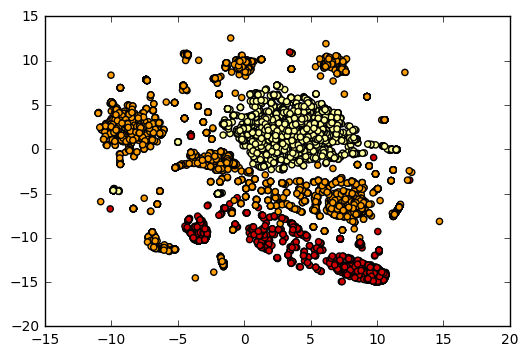

In [124]:
X, y = show(new_df, KMeans(n_clusters=3), TSNE(), num_classes=3)